In [1]:
#Imports
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Funcion que carga los datos
def load_csv(filename):
    valores = read_csv (filename, header=None).to_numpy()
    return valores.astype(float)

In [3]:
#Hipotesis
def h(x, theta):
    return theta[0] + theta[1] * x

In [4]:
#Funcion de Coste
def cost_function(X, Y, theta):
    observed = h(X, theta)
    return func_coste(Y, observed)

In [5]:
#Funcion Auxiliar de coste
def func_coste(expected, observed):
    #Utilizamos operaciones vectoriales para reducir el tiempo de ejecucion
    dif = (1/(2*len(expected)))*np.sum(np.subtract(expected, observed)**2)
    return dif

In [16]:
#Funcion Principal
def lineal_regresion_one_variable():
    data = load_csv('ex1data1.csv')
    
    #Primera Columna
    X = data[:,0]
    #Segunda Columna
    Y = data[:,1]
    
    # Numero de ejemplos de entrenamiento
    m = len(X)
    #Tamanho inicial de los saltos
    alpha = 0.01
    #Inicializacion de los valores de theta0 y theta1
    theta0 = theta1 = 0
    
    coste = list()
    for i in range(1500):
        #Hipotesis
        observed = h(X, [theta0, theta1])
        #Calculo de las Thetas
        theta0 = theta0 - (alpha/m) * np.sum(observed - Y)
        theta1 = theta1 - (alpha/m) * np.sum((observed - Y) * X)
        #Guardamos el coste obtenido por la funcion en una lista
        coste.append(cost_function(X, Y, [theta0, theta1]))
        
    #Imprimimos grafica con la funcion de la recta obtenida
    plt.plot(X, Y, "x")
    min_x = min(X)
    max_x = max(X)
    min_y = theta0 + theta1 * min_x
    max_y = theta0 + theta1 * max_x
    plt.plot([min_x, max_x], [min_y, max_y], color='red', linewidth=2)
    
    plt.savefig("part1_linear_regresion.png")
    plt.show
    
    return [theta0, theta1, coste]
    

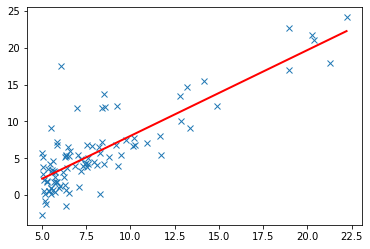

In [13]:
#Llamada a la funcion principal
l = lineal_regresion_one_variable()

In [8]:
def make_data(t0_range, t1_range, X, Y, step=0.1):
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
     # Theta0 y Theta1 tienen las misma dimensiones, de forma que
     # cogiendo un elemento de cada uno se generan las coordenadas x,y
     # de todos los puntos de la rejilla
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = cost_function(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
        
    return [Theta0, Theta1, Coste]

In [9]:
def show_contour(data, thetas):
    plt.contour(data[0],data[1],data[2],np.logspace(-2,3,20))
    plt.plot(thetas[0], thetas[1],'rx');
    plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
    plt.savefig("part1_contour.png")

In [10]:
def show_mesh(data):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(data[0], data[1], data[2], cmap=cm.jet, linewidth=0, antialiased=False)
    
    plt.show()
    fig.savefig("part1_mesh.png")

In [17]:
def print_graphs():
    data = load_csv('ex1data1.csv')
    X = data[:, 0]
    Y = data[:, 1]
    grid_data = make_data([-10, 10], [-1, 4], X, Y)
    
    dataPoint = lineal_regresion_one_variable()
    show_contour(grid_data, dataPoint)
    show_mesh(grid_data)

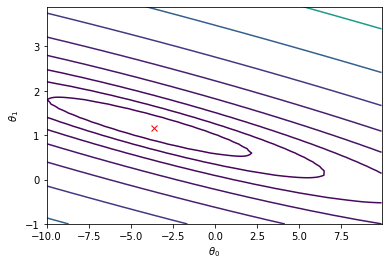

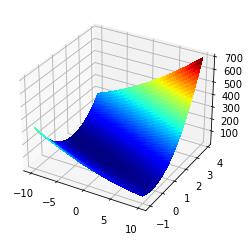

In [18]:
print_graphs()